In [1]:
import pickle as pkl
from gmr import GMM, plot_error_ellipses
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataset = "boulder"
cwd = '1. Outputs/' + dataset + "/"
cwd1 = '../2. R/1. Outputs/' + dataset +'/'

In [3]:
df = pd.read_csv(cwd1 + "sarima/cleaned_train.csv")
df['Start'] = pd.to_datetime(df['Start']).dt.round('1min')
#df['End'] = pd.to_datetime(df['End']).dt.round('1min')

raw_rows = len(df)
df = df[(df['Charge.Duration'] > 0) & (df['Energy']>0)]# Remove impossible sessions (negative charge.duration or negative energy)
print("Impossible sessions discarded: ", (raw_rows-len(df))/raw_rows, "%")

# sessions = pd.read_csv(cwd1 + "sarima/pred_sessions.csv")
# sessions['Start_date'] = pd.to_datetime(sessions['Start_date'])
triple = df[["Arrival","Charge.Duration","Energy"]].values

Impossible sessions discarded:  0.0 %


In [4]:
with open(cwd+"best_gmm_Charge.Duration.pkl", "rb") as fp:
    best_mm = pkl.load(fp)

In [5]:
# gmm = GMM(
#     n_components=3, priors=best_gmm.weights_, means=best_gmm.means_,
#     covariances=best_gmm.covariances_)

In [6]:
len(best_mm.weights_)

28

In [7]:
weights = pd.DataFrame({"cluster": list(range(len(best_mm.weights_))),"weight": best_mm.weights_})

In [8]:
relevant_weights = weights[weights['weight']>0.05]

In [9]:
np.unique(relevant_weights['weight']).sum()

0.5072223417278168

<AxesSubplot:xlabel='cluster', ylabel='weight'>

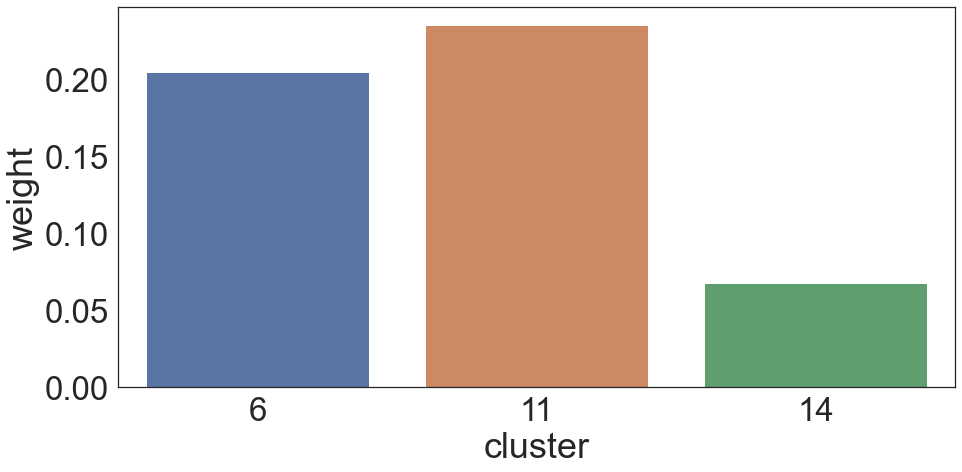

In [10]:
import seaborn as sns
sns.set(style = "white", font_scale=3)
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(
    x="cluster",
    y="weight",
data = relevant_weights)

In [11]:
data = pd.DataFrame(triple)

In [12]:
data.columns = ['Arrival','Charge Duration','Energy']

In [13]:
data['cluster'] = best_mm.predict(triple)

In [14]:
relevant_weights['cluster'].unique()

array([ 6, 11, 14], dtype=int64)

In [15]:
data['cluster'].unique()

array([27, 15,  4, 11,  6, 16, 17, 14, 22, 20, 12,  2,  8, 24,  7,  1, 23,
       18, 26,  3, 25,  9, 13,  5, 19, 21,  0, 10], dtype=int64)

In [16]:
data['cluster']

0       27
1       15
2        4
3       11
4        6
        ..
5248    11
5249     1
5250     5
5251    11
5252    11
Name: cluster, Length: 5253, dtype: int64

In [17]:
data['cluster'].isin(relevant_weights['cluster'].unique())

0       False
1       False
2       False
3        True
4        True
        ...  
5248     True
5249    False
5250    False
5251     True
5252     True
Name: cluster, Length: 5253, dtype: bool

In [18]:
relevant_data = data[data['cluster'].isin(relevant_weights['cluster'].unique())]

In [19]:
means = pd.DataFrame(best_mm.means_)
means.columns = ['Arrival','Charge.Duration','Energy']
means['cluster'] = list(range(len(best_mm.weights_)))
means['weight'] = list(best_mm.weights_)

In [20]:
round(means[means['cluster'].isin(relevant_weights['cluster'].unique())],2)

,Arrival,Charge.Duration,Energy,cluster,weight
6,18.75,72.93,3.87,6,0.20
11,18.40,83.98,8.48,11,0.24
14,1.51,80.14,8.12,14,0.07


In [21]:
means['weight'] = weights['weight']

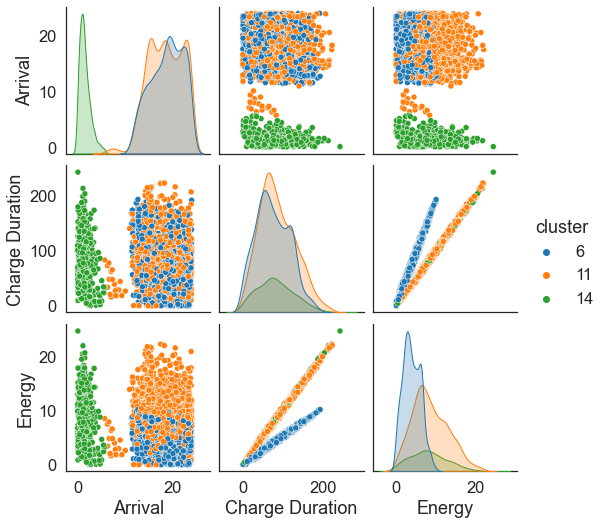

In [23]:
import matplotlib
matplotlib.rc('pdf', fonttype=42)
sns.set(style = "white", font_scale=1.5)
sns.pairplot(relevant_data,hue='cluster',palette='tab10')
plt.savefig(cwd+'gmm_plots.pdf')

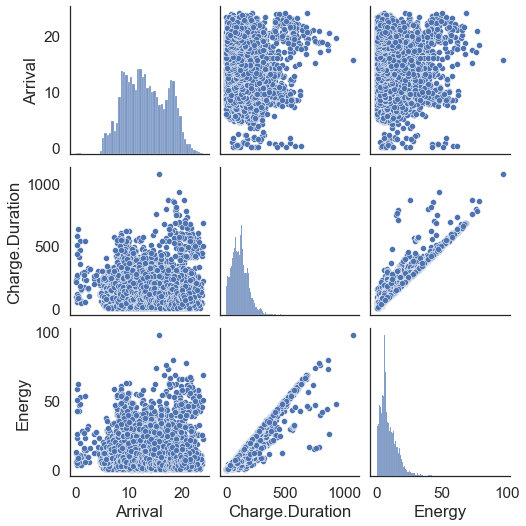

In [81]:
sns.set(style = "white", font_scale=1.4)
sns.pairplot(data[['Arrival','Charge.Duration','Energy']])

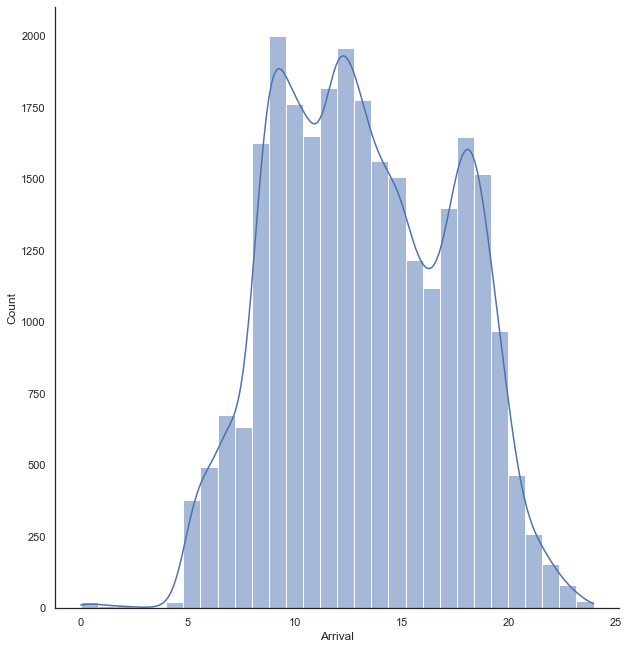

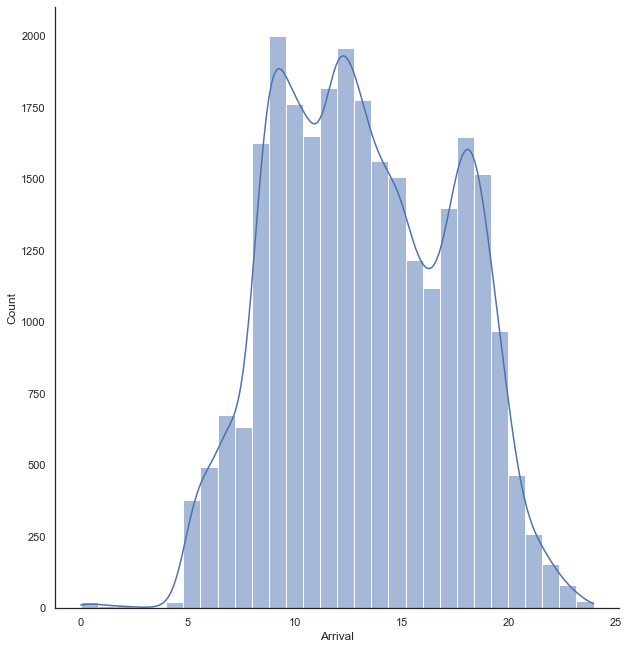

In [83]:
sns.set_theme(style="white")
g=sns.displot(x="Arrival",data=data, bins=30,kde=True)
g.fig.set_size_inches(10,10)
g.fig

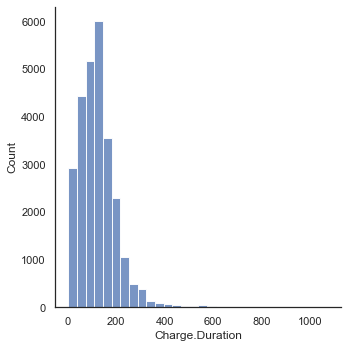

In [84]:
sns.displot(x="Charge.Duration",data=data,bins=30)

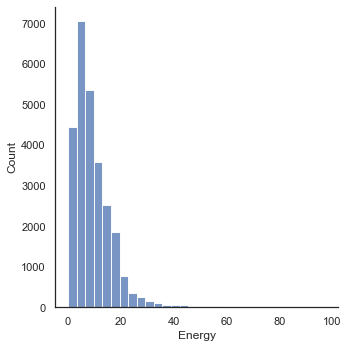

In [85]:
sns.displot(x="Energy",data=data,bins=30)